# Computation of shape contour and area during growth of propagules.


##  Documentation and Imports


Created on 27-05-2021

Author: Valentin Laplaud

This code aims to compute the shape of propagules growing in microfluidic chips. It detects gemmae contours using binarization, and saves the data of the contour position on the image, as well as the area and geometrical center position of each gemmae. 

A second part fits the evolution of gemmae in time with a delayed exponential.

In [3]:
## Clean up before script start 

for element in dir():

    if element[0:1] != "_":

        del globals()[element]

import gc
gc.collect()

# plotting stuff in jupyter
import matplotlib as mpl
mpl.use('TkAgg')
%matplotlib inline

COLOR = 'white'
COLOR2 = 'black'

mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['axes.edgecolor'] = COLOR

mpl.rcParams["figure.facecolor"] = COLOR2
mpl.rcParams["axes.facecolor"] = COLOR2
mpl.rcParams["savefig.facecolor"] = COLOR2
mpl.rcParams['axes.facecolor'] = COLOR2


# to hide known warnings
import warnings
warnings.filterwarnings("ignore")

# my functions
import sys
sys.path.append('../PythonFunctions/')
import VallapFunc as vf
from Main import BinarizeAndFitArea, BinarizeAndFitOsChoc
import numpy as np

## Fetch data details

In [4]:
%run D:/Users/laplaud/Desktop/PostDoc/Code/JupyterNB/ExperimentList.py

Data choice made.


## Run analysis

### Flux controls V5 (03/27-09-2021)

In [5]:
# BinarizeAndFitArea('210903_1mlh',StackList210903_1,P210903_1,Scale210903,FPH210903,Delay210903,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210903_500ulh',StackList210903_5,P210903_5,Scale210903,FPH210903,Delay210903,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])



# BinarizeAndFitArea('210927_1mlh',StackList210927_1,P210927_1,Scale210927,FPH210927,Delay210927,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('210927_500ulh',StackList210927_5,P210927_5,Scale210927,FPH210927,Delay210927,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### System control DV6 (22-10-2021)

In [6]:
# BinarizeAndFitArea('211022_Ct1',StackList211022_Ct1,P211022_Ct1,Scale211022,FPH211022,Delay211022,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211022_Ct2',StackList211022_Ct2,P211022_Ct2,Scale211022,FPH211022,Delay211022,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### Degas & BSA controls DV6 (05-11-2021, 22-12-2021)

In [7]:
# BinarizeAndFitArea('211105_Deg_Bsa',StackList211105_Deg_Bsa,P211105_Deg_Bsa,Scale211105,FPH211105,Delay211105,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])

# BinarizeAndFitArea('211105_Degas',StackList211105_Degas,P211105_Degas,Scale211105,FPH211105,Delay211105,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 20, 70),(60, 120,220)])



# BinarizeAndFitArea('211222_Deg_Bsa',StackList211222_Deg_Bsa,P211222_Deg_Bsa,Scale211222,FPH211222,Delay211222,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('211222_Degas',StackList211222_Degas,P211222_Degas,Scale211222,FPH211222,Delay211222,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(30, 30, 70),(60, 120,220)])

### Stade comparison DV6 (07/12/14-01-2022)

In [8]:
# BinarizeAndFitArea('220107_S1',StackList220107_S1,P220107_S1,Scale220107,FPH220107,Delay220107,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220107_S3',StackList220107_S3,P220107_S3,Scale220107,FPH220107,Delay220107,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(25, 30, 70),(60, 120,220)])



# BinarizeAndFitArea('220112_S1',StackList220112_S1,P220112_S1,Scale220112,FPH220112,Delay220112,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])

# BinarizeAndFitArea('220112_S3',StackList220112_S3,P220112_S3,Scale220112,FPH220112,Delay220112,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(20, 30, 70),(60, 120,220)])



# BinarizeAndFitArea('220114_S1',StackList220114_S1,P220114_S1,Scale220114,FPH220114,Delay220114,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])

# BinarizeAndFitArea('220114_S3',StackList220114_S3,P220114_S3,Scale220114,FPH220114,Delay220114,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(25, 25, 70),(60, 120,220)])

### System controls with Stade1 & degas DV6 (24-01-2022,14-02-2022)

In [9]:
fw = 15

# BinarizeAndFitArea('220124_Ct1',StackList220124_Ct1,P220124_Ct1,Scale220124,FPH220124,Delay220124,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=fw)

# BinarizeAndFitArea('220124_Ct2',StackList220124_Ct2,P220124_Ct2,Scale220124,FPH220124,Delay220124,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=fw)

# BinarizeAndFitArea('220214_Ct1',StackList220214_Ct1,P220214_Ct1,Scale220214,FPH220214,Delay220214,0.98,'F',
#                    debug = False, debugAll = False, debuglist = [0,1,2,3,4,10,20,30],HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=fw)

# BinarizeAndFitArea('220214_Ct2',StackList220214_Ct2,P220214_Ct2,Scale220214,FPH220214,Delay220214,0.98,'F',
#                    debug = False, debugAll = False, HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=fw)

### Osmotic choc after 14-02-2022 

In [10]:
# BinarizeAndFitOsChoc('220214_Ct1_Osmo',StackList220214_Ct1_Osmo,P220214_Ct1_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.98,'F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])

# BinarizeAndFitOsChoc('220214_Ct2_Osmo',StackList220214_Ct2_Osmo,P220214_Ct2_Osmo,Scale220214_Osmo,FPH220214_Osmo,0.98,'F',
#                    showHist = False, debug = False, HSVrange =[(15, 30, 60),(70, 140,220)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])
  

### Manitol 100mM (01-03-2022) + OC

In [11]:
# BinarizeAndFitArea('220301_Ct',StackList220301_Ct,P220301_Ct,Scale220301,FPH220301,Delay220301,0.98,'F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=15)
# BinarizeAndFitOsChoc('220301_Ct_Osmo',StackList220301_Ct_Osmo,P220301_Ct_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.98,'F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [23,60])



# BinarizeAndFitArea('220301_M100',StackList220301_M100,P220301_M100,Scale220301,FPH220301,Delay220301,0.98,'F',
#                    debug = False, debugAll = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],fitwindow=15)
# BinarizeAndFitOsChoc('220301_M100_Osmo',StackList220301_M100_Osmo,P220301_M100_Osmo,Scale220301_Osmo,FPH220301_Osmo,0.98,'F',
#                    showHist = False, debug = False, debuglist = [0], HSVrange =[(15, 17, 60),(70, 140,220)],
#                      FitIntervalComp = [0,25],FitIntervalRel = [23,60])

### Natalia's ABA experiments (22-07-2022)

In [12]:

# BinarizeAndFitArea('220722_Ct',StackList220722_Ct,P220722_Ct,Scale220722,FPH220722,Delay220722,0.98,'F',
#                    debug = True, debugAll = False, debuglist = [1, 20, 50], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220722_ABA',StackList220722_ABA,P220722_ABA,Scale220722,FPH220722,Delay220722,0.98,'F',
#                    debug = True, debugAll = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)



### DV7 Controls + Choc hyper/hypo (27-07-22)

Unknown key : debugAll. Kwarg ignored.



220727_Hypo_Osmo


Processing PPG1 :


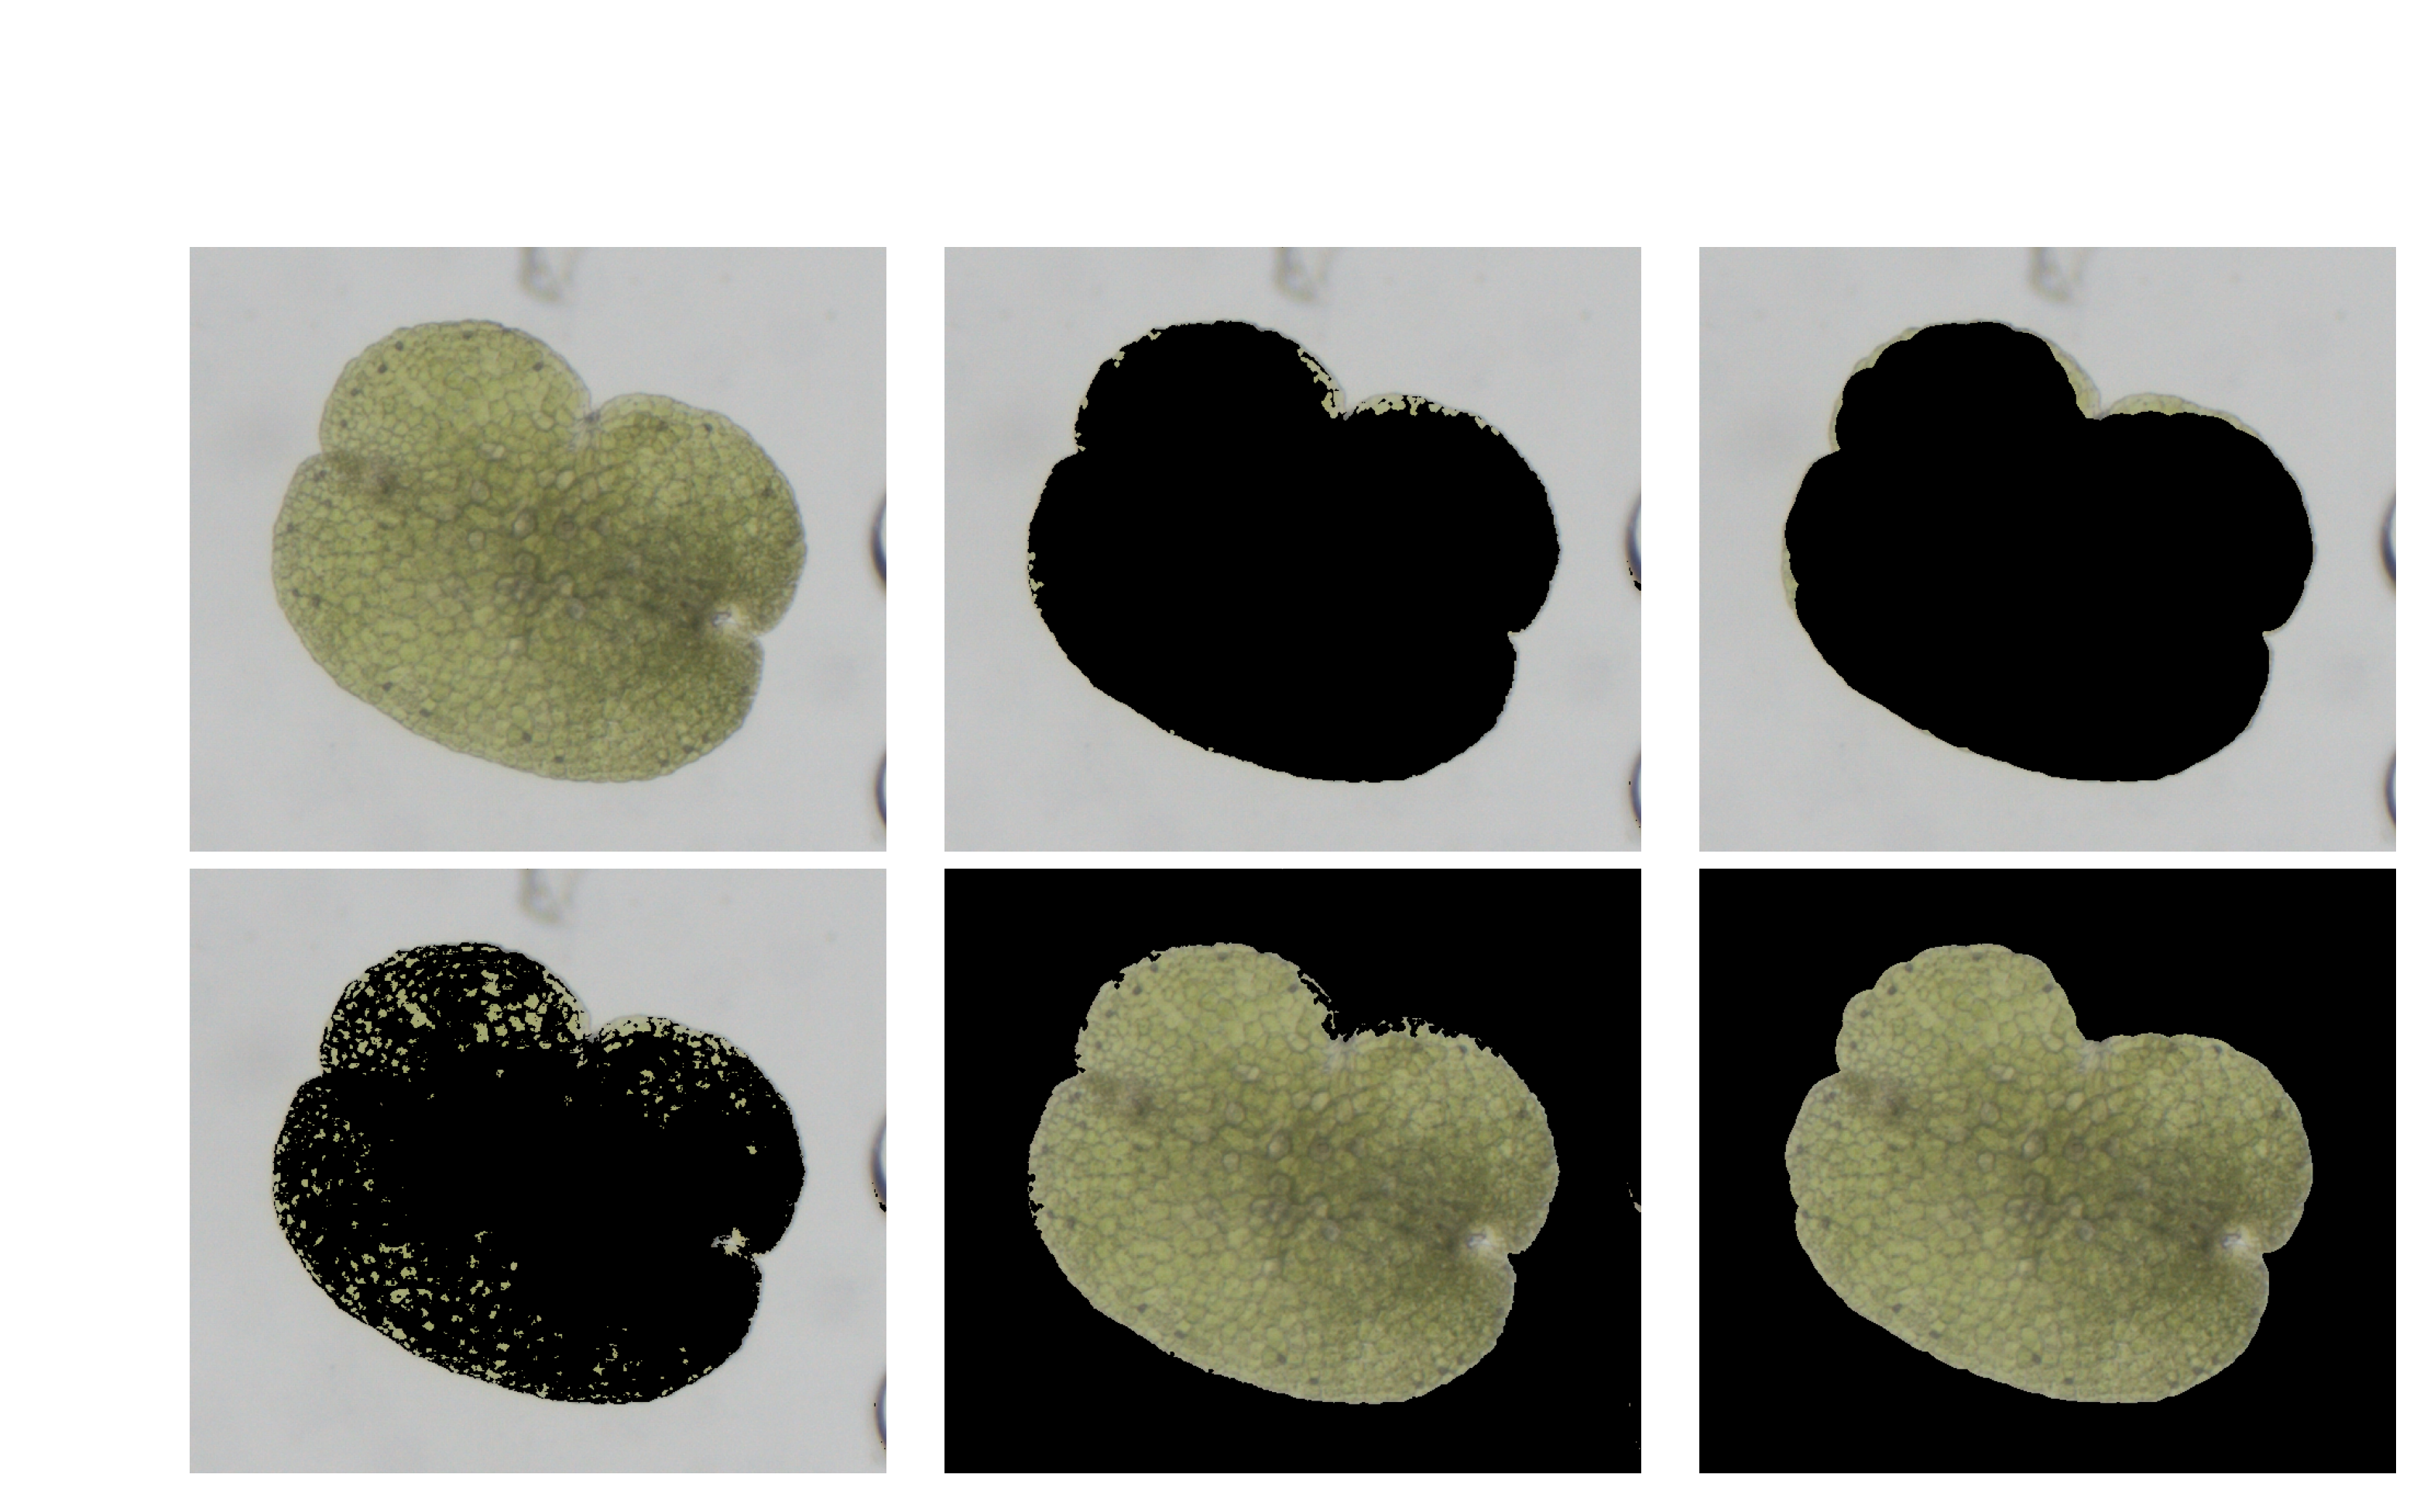


Binarization done for 73/73 images             
Processing PPG2 :


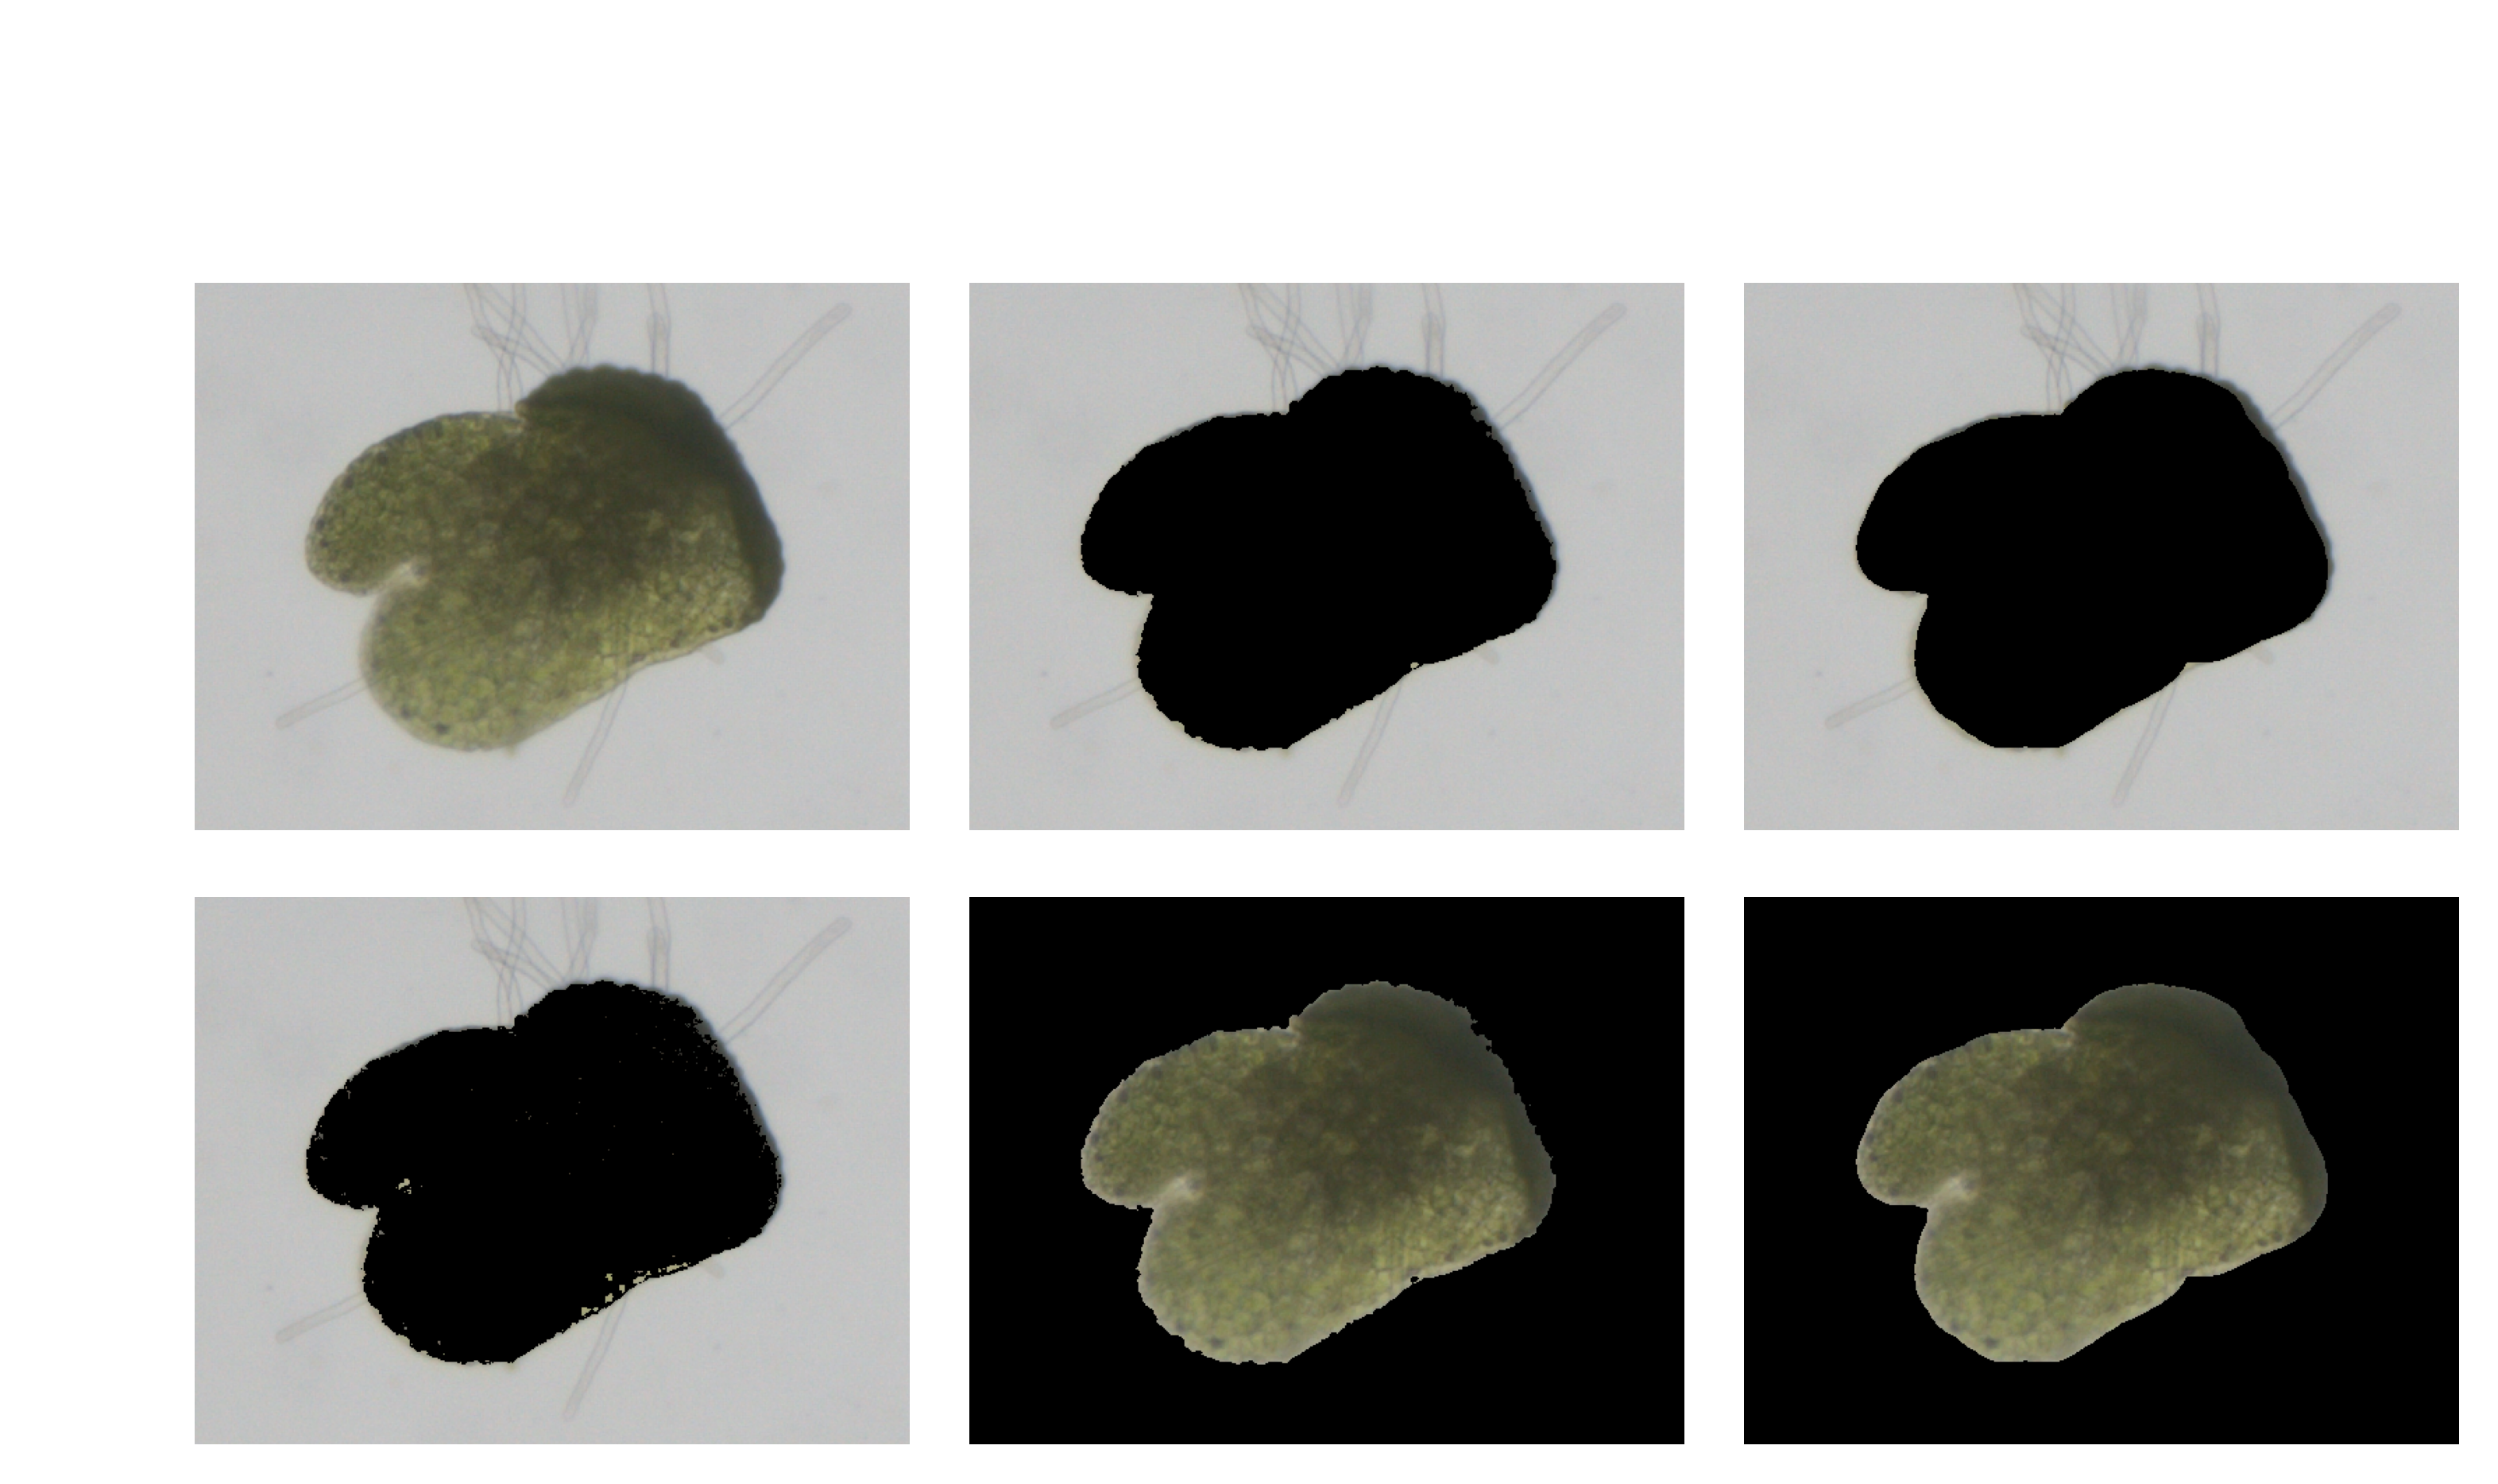


Binarization done for 73/73 images             
Processing PPG3 :


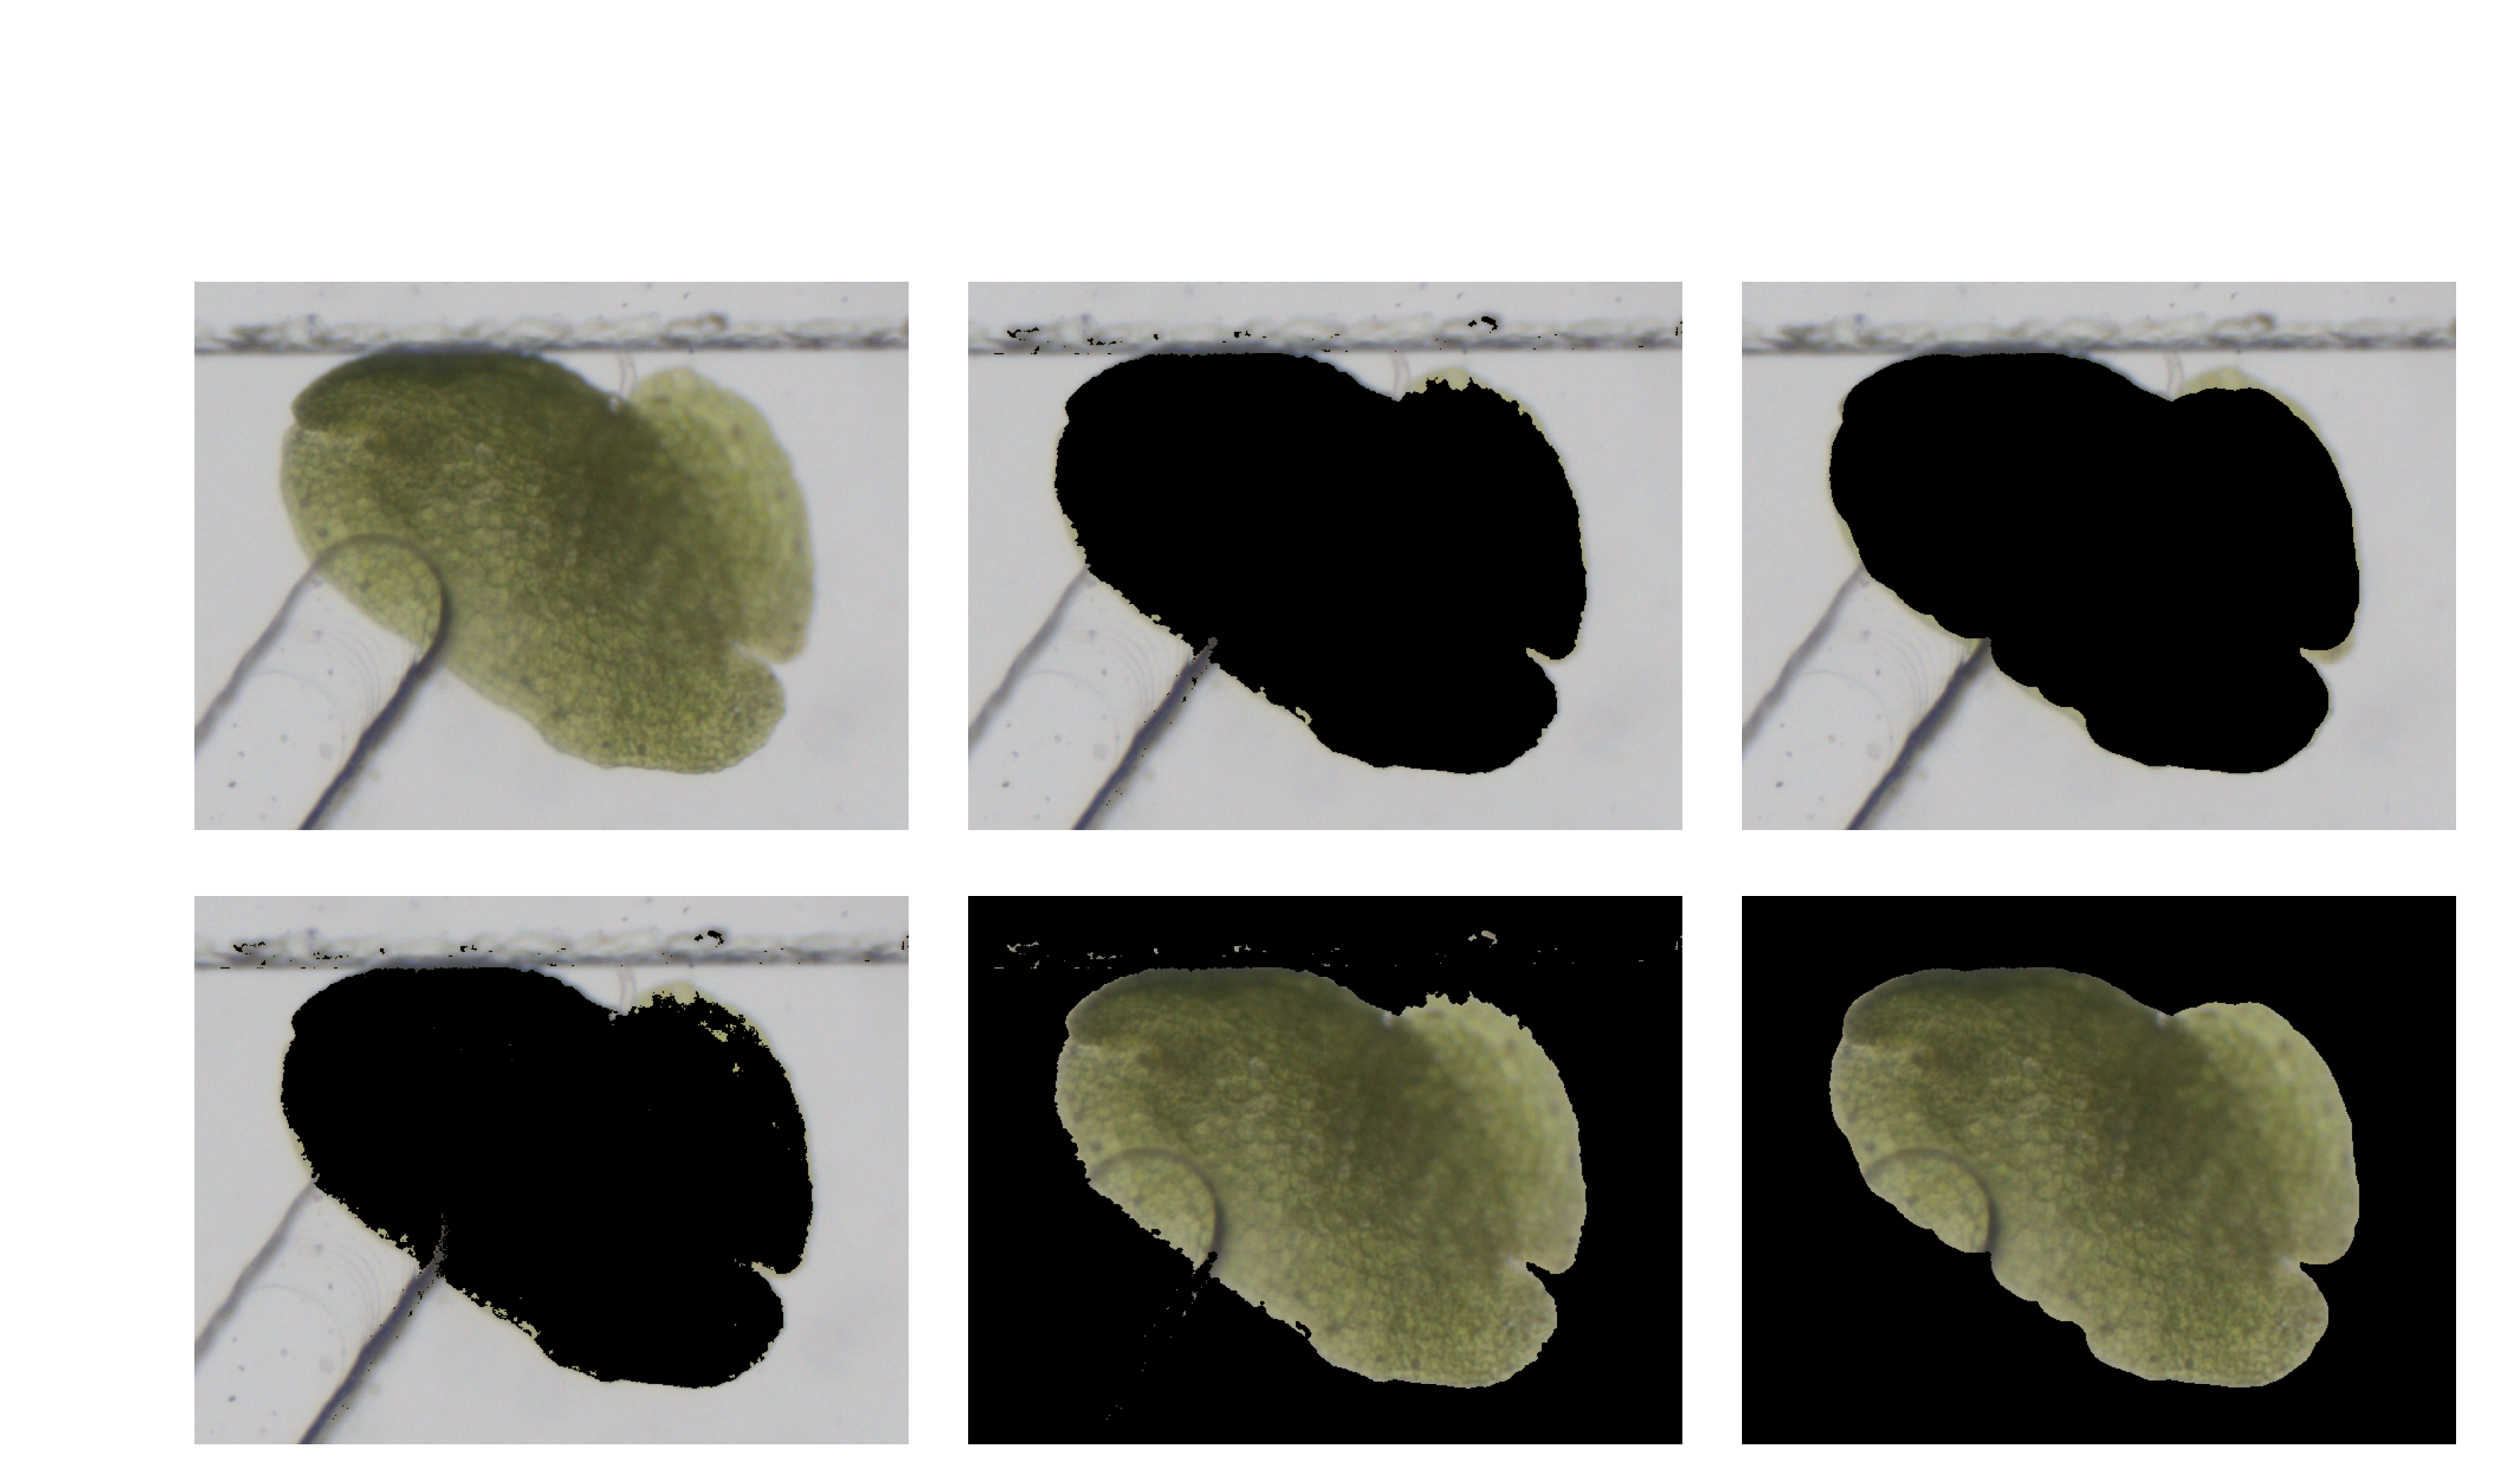


Binarization done for 73/73 images             
Processing PPG4 :


IndexError: tuple index out of range

In [14]:
# BinarizeAndFitArea('220727_Hyper',StackList220727_Hyper,P220727_Hyper,Scale220727,FPH220727,Delay220722,0.98,'CF',
#                    debug = True, debugAll = False, debuglist = np.arange(0,61), HSVrange =[(15, 25, 40),(70, 150,160)],fitwindow=15)

# BinarizeAndFitArea('220727_Hypo',StackList220727_Hypo,P220727_Hypo,Scale220727,FPH220727,Delay220722,0.98,'BCF',
#                    debug = True, debugAll = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],fitwindow=15)



# BinarizeAndFitOsChoc('220727_Hyper_Osmo',StackList220727_Hyper_Osmo,P220727_Hyper_Osmo,Scale220727,FPH220727,0.98,'BCF',
#                    debug = True, debugAll = False, debuglist = [0], HSVrange =[(20, 25, 40),(70, 150,160)],FitIntervalComp = [0,25],
#                      FitIntervalRel = [23,60])

BinarizeAndFitOsChoc('220727_Hypo_Osmo',StackList220727_Hypo_Osmo,P220727_Hypo_Osmo,Scale220727,FPH220727,0.98,'B',
                   debug = True, debugAll = True, debuglist = [0], HSVrange =[(20, 25, 40),(70, 180,160)],FitIntervalComp = [0,25],
                     FitIntervalRel = [23,60])

## Test Zone

In [ ]:
# %run D:/Users/laplaud/Desktop/PostDoc/Code/JupyterNB/PropaguleAnalysis/2_AreaAnalysis.ipynb